In [65]:
#task 1
import pandas as pd


# Load the dataset
Grc_df = pd.read_csv("Grocery_dataset.csv")

# Display the number of rows and columns
print("Number of rows:", Grc_df.shape[0])
print("Number of columns:", Grc_df.shape[1])

# Display the first 10 rows
print("\nFirst 10 rows:")
print(Grc_df.head(10))
#Display the last 10 rows
print("\nLast 10 rows:")
print(Grc_df.tail(10))

Number of rows: 5000
Number of columns: 12

First 10 rows:
  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15        9.300          Low Fat         0.016047   
1           DRC01        5.920          Regular         0.019278   
2           FDN15       17.500          Low Fat         0.016760   
3           FDX07       19.200          Regular         0.000000   
4           NCD19        8.930          Low Fat         0.000000   
5           FDP36       10.395          Regular         0.000000   
6           FDO10       13.650          Regular         0.012741   
7           FDP10          NaN          Low Fat         0.127470   
8           FDH17       16.200          Regular         0.016687   
9           FDU28       19.200          Regular         0.094450   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat

In [66]:
#task 2
import pandas as pd

# Check for null values in each column
null_counts = Grc_df.isnull().sum()
print("Columns with null values and their counts:")
print(null_counts[null_counts > 0])

# Handle null values
# Fill missing Item_Weight with the mean
Grc_df['Item_Weight'] = Grc_df['Item_Weight'].fillna(Grc_df['Item_Weight'].mean())

# Fill missing Outlet_Size with the mode
Grc_df['Outlet_Size'] = Grc_df['Outlet_Size'].fillna(Grc_df['Outlet_Size'].mode()[0])

# Confirm that nulls have been handled
print("\nNull values after handling:")
print(Grc_df.isnull().sum())



Columns with null values and their counts:
Item_Weight     818
Outlet_Size    1439
dtype: int64

Null values after handling:
Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


In [67]:
#task 3

print("Outlet Size Analysis:")
# Count and print number of unique values
print("Number of unique outlet sizes:", Grc_df['Outlet_Size'].nunique(dropna=True))

# Print value counts
print("Unique sizes and their counts:")
for size, count in Grc_df['Outlet_Size'].value_counts().items():
    print(f"{size}    {count}")

# Most and least frequent
print("\nMost frequent size:", Grc_df['Outlet_Size'].value_counts().idxmax())
print("Least frequent size:", Grc_df['Outlet_Size'].value_counts().idxmin())



Outlet Size Analysis:
Number of unique outlet sizes: 3
Unique sizes and their counts:
Medium    3044
Small    1398
High    558

Most frequent size: Medium
Least frequent size: High


In [68]:
#Task 4

print("Item Fat Content - Before Cleaning:")
print(Grc_df['Item_Fat_Content'].unique())
print("Number of unique fat content types before cleaning:", Grc_df['Item_Fat_Content'].nunique())

# Standardize inconsistent labels
Grc_df['Item_Fat_Content'] = Grc_df['Item_Fat_Content'].replace({
    'low fat': 'Low Fat',
    'LF': 'Low Fat',
    'reg': 'Regular'
})

print("\nItem Fat Content - After Cleaning:")
print(Grc_df['Item_Fat_Content'].unique())
print("Number of unique fat content types after cleaning:", Grc_df['Item_Fat_Content'].nunique())

Item Fat Content - Before Cleaning:
['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Number of unique fat content types before cleaning: 5

Item Fat Content - After Cleaning:
['Low Fat' 'Regular']
Number of unique fat content types after cleaning: 2


In [69]:
#task 5

# Drop columns at index 0 and 6
columns_to_drop = [Grc_df.columns[0], Grc_df.columns[6]]
Grc_new_df = Grc_df.drop(columns=columns_to_drop)

# Display the new DataFrame's columns to confirm
print("Columns after dropping index 0 and 6:")
Grc_new_df.columns


Columns after dropping index 0 and 6:


Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [70]:
#task 6

# Step 1: Check unique Outlet Types
print("Unique Outlet Types:")
print(Grc_new_df['Outlet_Type'].unique())

# Step 2: Create two DataFrames based on Outlet_Type
# Adjust these values if your dataset has different types
SupType_1 = Grc_new_df[Grc_new_df['Outlet_Type'] == 'Supermarket Type1']
SupType_2 = Grc_new_df[Grc_new_df['Outlet_Type'] == 'Supermarket Type2']

# Step 3: Confirm the split
print("\nSupType_1 shape:", SupType_1.shape)
print("SupType_2 shape:", SupType_2.shape)

# Optional: Preview the data
from IPython.display import display
print("\nSupType_1 preview:")
display(SupType_1.head())

print("\nSupType_2 preview:")
display(SupType_2.head())



Unique Outlet Types:
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']

SupType_1 shape: (3328, 10)
SupType_2 shape: (526, 10)

SupType_1 preview:


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
6,13.65,Regular,0.012741,Snack Foods,57.6588,1987,High,Tier 3,Supermarket Type1,343.5528
8,16.20,Regular,0.016687,Frozen Foods,96.9726,2002,Medium,Tier 2,Supermarket Type1,1076.5986



SupType_2 preview:


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
5,10.395,Regular,0.000000,Baking Goods,51.4008,2009,Medium,Tier 3,Supermarket Type2,556.6088
16,11.800,Low Fat,0.008596,Health and Hygiene,115.3492,2009,Medium,Tier 3,Supermarket Type2,1621.8888
31,18.600,Low Fat,0.080829,Health and Hygiene,96.4436,2009,Medium,Tier 3,Supermarket Type2,2741.7644
32,18.700,Low Fat,0.000000,Snack Foods,256.6672,2009,Medium,Tier 3,Supermarket Type2,3068.0064


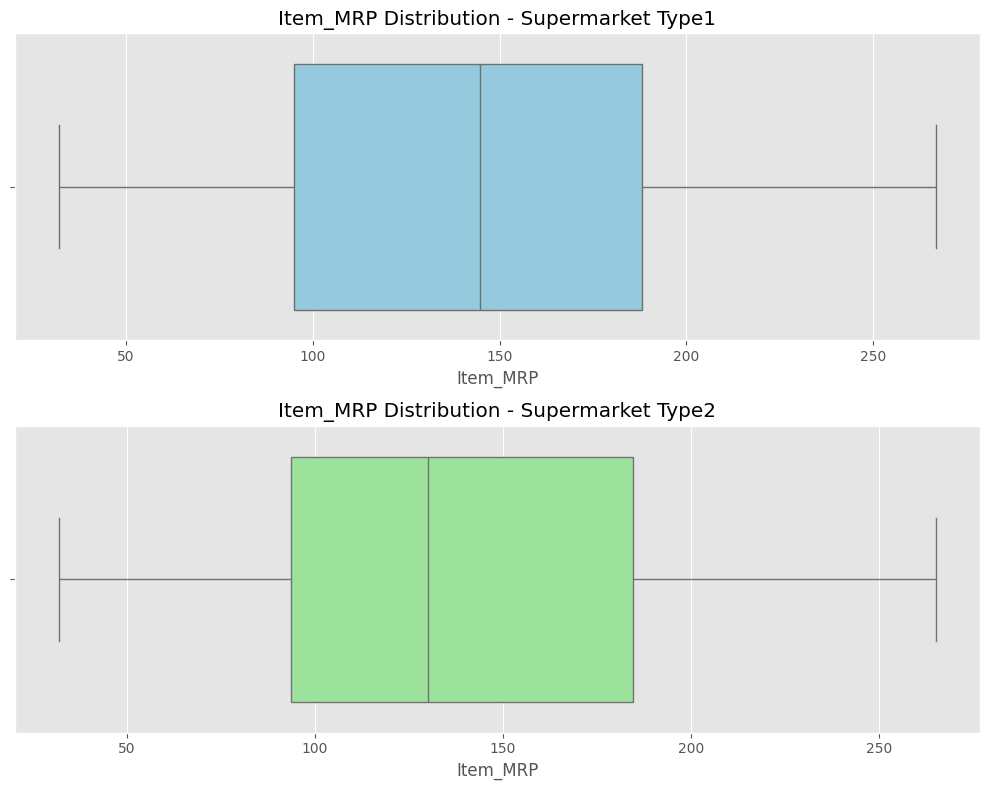

In [71]:
#task 7
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set Matplotlib style to ggplot
plt.style.use('ggplot')

# Load the dataset
df = pd.read_csv("Grocery_dataset.csv")

# Standardize inconsistent labels in Item_Fat_Content
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({
    'low fat': 'Low Fat',
    'LF': 'Low Fat',
    'reg': 'Regular'
})

# Drop columns at index 0 and 6
columns_to_drop = [df.columns[0], df.columns[6]]
Grc_new_df = df.drop(columns=columns_to_drop)

# Create two DataFrames based on Outlet_Type
SupType_1 = Grc_new_df[Grc_new_df['Outlet_Type'] == 'Supermarket Type1']
SupType_2 = Grc_new_df[Grc_new_df['Outlet_Type'] == 'Supermarket Type2']

# Create a (2,1) subplot for box plots of Item_MRP
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Box plot for SupType_1
sns.boxplot(data=SupType_1, x='Item_MRP', ax=axes[0], color='skyblue')
axes[0].set_title('Item_MRP Distribution - Supermarket Type1')

# Box plot for SupType_2
sns.boxplot(data=SupType_2, x='Item_MRP', ax=axes[1], color='lightgreen')
axes[1].set_title('Item_MRP Distribution - Supermarket Type2')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [72]:
#task 8
import pandas as pd

# Load the dataset
df = pd.read_csv("Grocery_dataset.csv")

# Standardize inconsistent labels in Item_Fat_Content
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({
    'low fat': 'Low Fat',
    'LF': 'Low Fat',
    'reg': 'Regular'
})

# Drop columns at index 0 and 6
columns_to_drop = [df.columns[0], df.columns[6]]
Grc_new_df = df.drop(columns=columns_to_drop)

# Create two DataFrames based on Outlet_Type
SupType_1 = Grc_new_df[Grc_new_df['Outlet_Type'] == 'Supermarket Type1']
SupType_2 = Grc_new_df[Grc_new_df['Outlet_Type'] == 'Supermarket Type2']

# Task 8: Concatenate SupType_1 and SupType_2 into Grc_Concat_df
Grc_Concat_df = pd.concat([SupType_1, SupType_2], ignore_index=True)

# Sort by Item_Outlet_Sales in ascending order
Grc_Concat_df_sorted = Grc_Concat_df.sort_values(by='Item_Outlet_Sales', ascending=True)

# Identify the Outlet_Location_Type of the store with the lowest sales
lowest_sales_location_type = Grc_Concat_df_sorted.iloc[0]['Outlet_Location_Type']

# Display the result
lowest_sales_location_type

'Tier 3'

In [73]:
#task 9
import pandas as pd

# Load the dataset
df = pd.read_csv("Grocery_dataset.csv")

# Standardize inconsistent labels in Item_Fat_Content
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({
    'low fat': 'Low Fat',
    'LF': 'Low Fat',
    'reg': 'Regular'
})

# Drop columns at index 0 and 6
columns_to_drop = [df.columns[0], df.columns[6]]
Grc_new_df = df.drop(columns=columns_to_drop)

# Create two DataFrames based on Outlet_Type
SupType_1 = Grc_new_df[Grc_new_df['Outlet_Type'] == 'Supermarket Type1']
SupType_2 = Grc_new_df[Grc_new_df['Outlet_Type'] == 'Supermarket Type2']

# Concatenate the two DataFrames
Grc_Concat_df = pd.concat([SupType_1, SupType_2], ignore_index=True)

# Sort by Item_Outlet_Sales in ascending order
Grc_Concat_df = Grc_Concat_df.sort_values(by='Item_Outlet_Sales', ascending=True)

# Create a multiple index using Outlet_Size and Outlet_Location_Type
Grc_Concat_df.set_index(['Outlet_Size', 'Outlet_Location_Type'], inplace=True)

# Display the first few rows of the multi-indexed DataFrame
Grc_Concat_df.head()

Item_Weight Item_Fat_Content  \
Outlet_Size Outlet_Location_Type                                 
High        Tier 3                     20.500          Low Fat   
Medium      Tier 3                      6.635          Regular   
            Tier 3                      6.320          Low Fat   
NaN         Tier 2                      9.105          Low Fat   
Small       Tier 1                     19.250          Low Fat   

                                  Item_Visibility     Item_Type  Item_MRP  \
Outlet_Size Outlet_Location_Type                                            
High        Tier 3                       0.143164     Household   34.9190   
Medium      Tier 3                       0.046278  Frozen Foods   36.7506   
            Tier 3                       0.012770          Meat   39.9822   
NaN         Tier 2                       0.038560     Household   33.8900   
Small       Tier 1                       0.108030     Household   32.4558   

                                  Outlet_Establishment_Year  \
Outlet_Size Outlet_Location_Type                              
High        Tier 3                                     1987   
Medium      Tier 3                                     2009   
            Tier 3                                     2009   
NaN         Tier 2                                     2002   
Small       Tier 1                                     1997   

                                        Outlet_Type  Item_Outlet_Sales  
Outlet_Size Outlet_Location_Type                                        
High        Tier 3                Supermarket Type1            73.2380  
Medium      Tier 3                Supermarket Type2            75.9012  
            Tier 3                Supermarket Type2            78.5644  
NaN         Tier 2                Supermarket Type1            99.8700  
Small       Tier 1                Supermarket Type1           101.8674

In [ ]:
#Task  10

import pandas as pd

# Load the dataset
df = pd.read_csv("Grocery_dataset.csv")

# Standardize inconsistent labels in Item_Fat_Content
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({
    'low fat': 'Low Fat',
    'LF': 'Low Fat',
    'reg': 'Regular'
})

# Drop columns at index 0 and 6
columns_to_drop = [df.columns[0], df.columns[6]]
Grc_new_df = df.drop(columns=columns_to_drop)

# Create two DataFrames based on Outlet_Type
SupType_1 = Grc_new_df[Grc_new_df['Outlet_Type'] == 'Supermarket Type1']
SupType_2 = Grc_new_df[Grc_new_df['Outlet_Type'] == 'Supermarket Type2']

# Concatenate the two DataFrames
Grc_Concat_df = pd.concat([SupType_1, SupType_2])

# Sort by Item_Outlet_Sales in ascending order
Grc_Concat_df = Grc_Concat_df.sort_values(by='Item_Outlet_Sales')

# Cut Item_Weight into 10 equal-width buckets
weight_bins = pd.cut(Grc_Concat_df['Item_Weight'], bins=10)

# Group by the weight bins and compute mean, min, max, and count
bucket_stats = Grc_Concat_df.groupby(weight_bins, observed=False)['Item_Weight'].agg(['mean', 'min', 'max', 'count'])

# Display the result
bucket_stats.reset_index(inplace=True)
bucket_stats.columns = ['Weight Bucket', 'Mean Weight', 'Min Weight', 'Max Weight', 'Count']
bucket_stats


,Weight Bucket,Mean Weight,Min Weight,Max Weight,Count
0,"(4.538, 6.234]",5.623814,4.555,6.215,253
1,"(6.234, 7.914]",7.121807,6.235,7.905,476
2,"(7.914, 9.594]",8.761867,7.930,9.500,450
3,"(9.594, 11.273]",10.344917,9.600,11.150,362
4,"(11.273, 12.952]",12.081635,11.300,12.850,419
5,"(12.952, 14.632]",13.716193,13.000,14.600,352
6,"(14.632, 16.312]",15.495976,14.650,16.250,410
7,"(16.312, 17.991]",17.172672,16.350,17.850,408
8,"(17.991, 19.671]",18.838005,18.000,19.600,396
9,"(19.671, 21.35]",20.357012,19.700,21.350,328
